### Relevante pakker

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [3]:
df = pd.read_csv("./dataset/lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [5]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages',  'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

def categorize_theme(theme):
    # Popularkultur themes from the table
    pop_culture = ['Star Wars', 'Marvel', 'Disney', 'THE LEGO MOVIE 2', 'Minecraft', 
                   'Harry Potter', 'Jurassic World', 'Batman', 'DC', 'Monkie Kid', 
                   'Trolls World Tour', 'Overwatch', 'LEGO Frozen 2','Unikitty', 'Spider-Man', 
                   'Powerpuff Girls', 'Minions', 'Stranger Things']
    
    # Regular themes from the table
    regular = ['Friends','City', 'NINJAGO', 'DUPLO', 'Creator 3-in-1', 'Technic', 'Classic', 'Speed Champions',
              'Creator Expert',  'Juniors', 'Architecture', 'DOTS']
    
    # Unknown themes from the table
    unknown = [ 'BrickHeadz', 'Hidden Side', 'Powered UP',
              'Xtra', 'Minifigures', 'Ideas']
    
    if theme in pop_culture:
        return 'pop_culture'
    elif theme in regular:
        return 'regular'
    elif theme in unknown:
        return 'unknown'
    else:
        return 'unknown'  # Default case for any themes not in our lists

# Add the new column
df2['theme_category'] = df2['Theme'].apply(categorize_theme)

# det er dataset dere skal bruke!
df2

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jeppe\AppData\Local\Temp\ipykernel_61568\1432629169.py:12: SyntaxWarning: invalid escape sequence '\$'
  df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)


,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces,theme_category
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,28.0,regular
3,Creative Green Bricks,Classic,60.0,4.99,37.0,36.0,regular
11,Fire Truck,DUPLO,6.0,6.99,3.0,6.0,regular
12,Tow Truck,DUPLO,7.0,6.99,3.0,7.0,regular
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0,regular
...,...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0,pop_culture
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0,pop_culture
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,622.0,pop_culture
1176,Grand Piano,Ideas,3662.0,349.99,564.0,345.0,unknown


3 Modeller


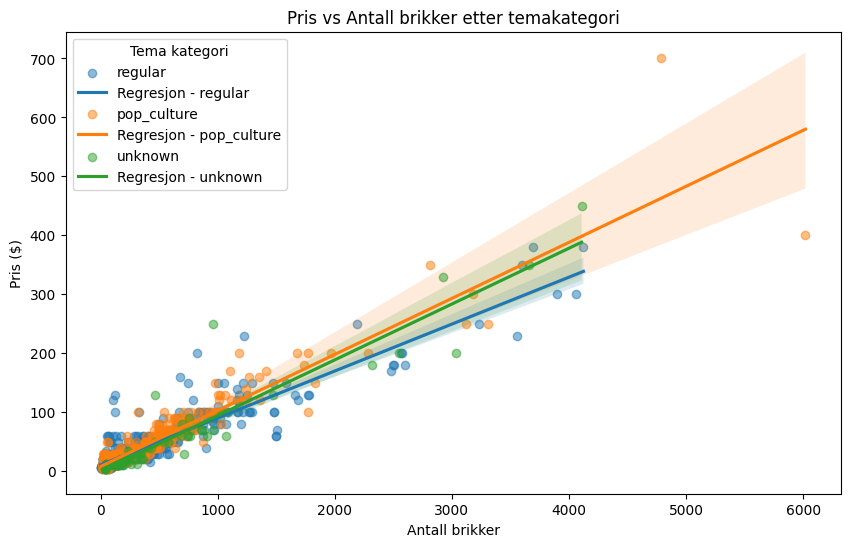


Statistikk for hver kategori:

regular:
Stigningstall: 0.0795 $/brikke
R²: 0.8453
95% konfidensintervall for stigningstallet: [0.0765, 0.0826]

pop_culture:
Stigningstall: 0.0950 $/brikke
R²: 0.8700
95% konfidensintervall for stigningstallet: [0.0912, 0.0988]

unknown:
Stigningstall: 0.0946 $/brikke
R²: 0.8874
95% konfidensintervall for stigningstallet: [0.0866, 0.1026]


C:\Users\jeppe\AppData\Local\Temp\ipykernel_61568\2619379766.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Stigningstall: {model.params[1]:.4f} $/brikke")
C:\Users\jeppe\AppData\Local\Temp\ipykernel_61568\2619379766.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Stigningstall: {model.params[1]:.4f} $/brikke")
C:\Users\jeppe\AppData\Local\Temp\ipykernel_61568\2619379766.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

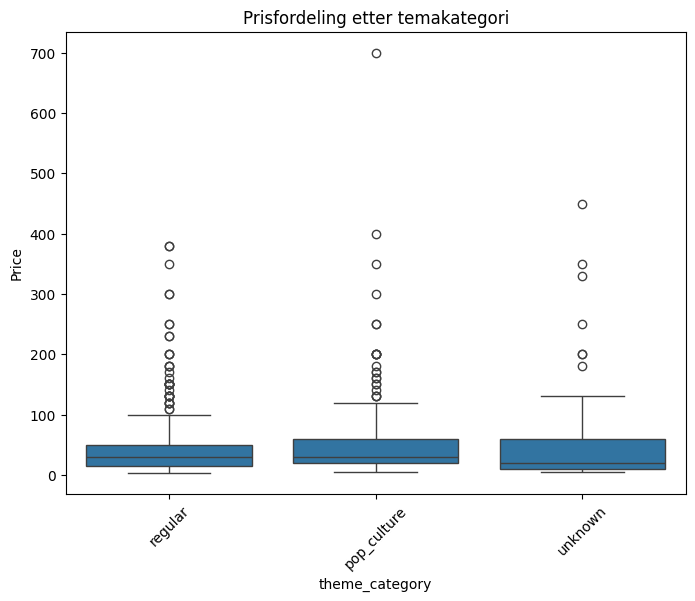


Beskrivende statistikk for hver kategori:
                count       mean        std   min    25%    50%    75%     max
theme_category                                                                
pop_culture     367.0  48.605804  59.691530  3.99  19.99  29.99  59.99  699.99
regular         482.0  44.806390  51.505222  3.49  14.99  29.99  49.99  379.99
unknown          73.0  54.455753  84.041009  3.99   9.99  19.99  59.99  449.99

Model 2 - Interaksjonsmodell:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1154.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:19:02   Log-Likelihood:                -4134.9
No. Observations:                 922   AIC:             

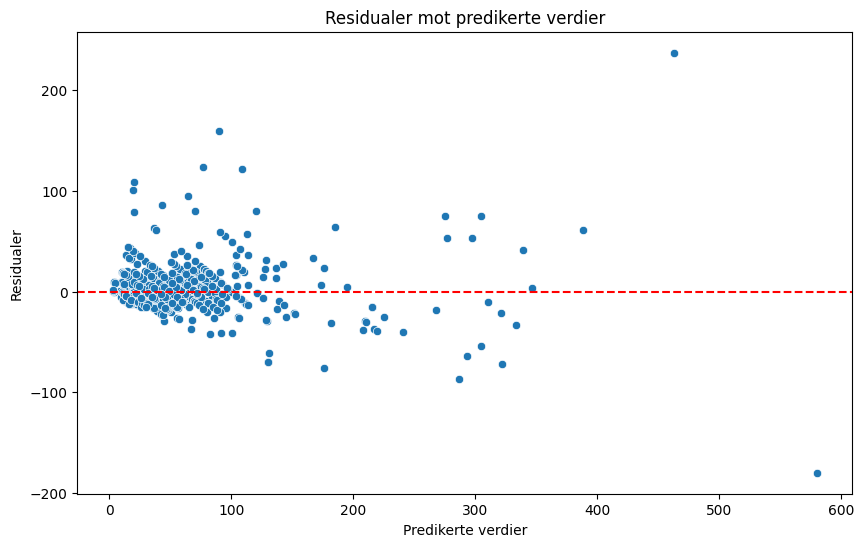

<Figure size 1000x600 with 0 Axes>

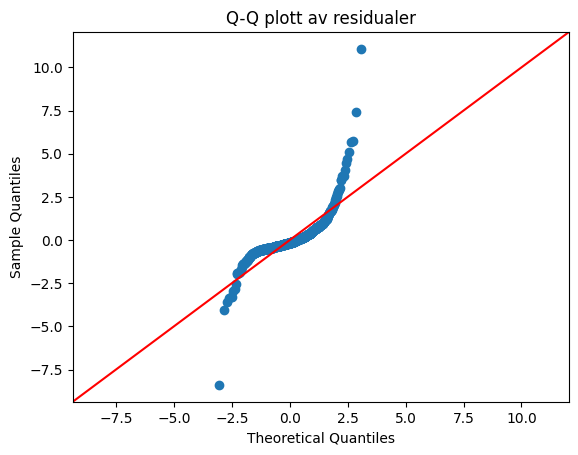

In [ ]:


# Steg 1: Bli kjent med dataene
# Plott pris mot antall brikker for hver kategori
# Plott med regresjonslinjer
plt.figure(figsize=(10, 6))

# Bruk regplot for hver kategori - dette legger til både regresjonslinje og konfidensintervall
for category in df2['theme_category'].unique():
    subset = df2[df2['theme_category'] == category]
    sns.regplot(data=subset, x='Pieces', y='Price', 
                scatter_kws={'alpha':0.5}, 
                label=category,
                line_kws={'label': f'Regresjon - {category}'})

plt.title('Pris vs Antall brikker etter temakategori')
plt.xlabel('Antall brikker')
plt.ylabel('Pris ($)')
plt.legend(title='Tema kategori')
plt.show()

# Print stigningstall og R² for hver kategori
print("\nStatistikk for hver kategori:")
for category in df2['theme_category'].unique():
    subset = df2[df2['theme_category'] == category]
    model = sm.OLS(subset['Price'], sm.add_constant(subset['Pieces'])).fit()
    print(f"\n{category}:")
    print(f"Stigningstall: {model.params[1]:.4f} $/brikke")
    print(f"R²: {model.rsquared:.4f}")
    print(f"95% konfidensintervall for stigningstallet: [{model.conf_int().iloc[1,0]:.4f}, {model.conf_int().iloc[1,1]:.4f}]")

# Boksplott av pris for hver kategori
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='theme_category', y='Price')
plt.title('Prisfordeling etter temakategori')
plt.xticks(rotation=45)
plt.show()

# Beskrivende statistikk
print("\nBeskrivende statistikk for hver kategori:")
print(df2.groupby('theme_category')['Price'].describe())

# Steg 2-3: Spesifiser og tilpass modellene

# Model 1: Basismodell
model1 = smf.ols('Price ~ Pieces + C(theme_category)', data=df2).fit()

# Model 2: Interaksjonsmodell
model2 = smf.ols('Price ~ Pieces + C(theme_category) + Pieces:C(theme_category) + Unique_Pieces + Pages', data=df2).fit()

# Model 3: Utvidet modell
model3 = smf.ols('Price ~ Pieces + C(theme_category) + Unique_Pieces + Pages', data=df2).fit()

# Steg 4: Presenter resultater
# print("\nModel 1 - Basismodell:")
# print(model1.summary())

print("\nModel 2 - Interaksjonsmodell:")
print(model2.summary())

# print("\nModel 3 - Utvidet modell:")
# print(model3.summary())

# Steg 5: Evaluer modellene

# Plott residualer mot predikerte verdier for beste modell (basert på justert R2)
best_model = model2  # Vi velger modell 3 basert på justert R2

# Residualplott
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_model.fittedvalues, y=best_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residualer mot predikerte verdier')
plt.xlabel('Predikerte verdier')
plt.ylabel('Residualer')
plt.show()

# QQ-plott
plt.figure(figsize=(10, 6))
sm.graphics.qqplot(best_model.resid, line='45', fit=True)
plt.title('Q-Q plott av residualer')
plt.show()



Transformert modell:
                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     630.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.38e-293
Time:                        10:40:01   Log-Likelihood:                -543.13
No. Observations:                 922   AIC:                             1098.
Df Residuals:                     916   BIC:                             1127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

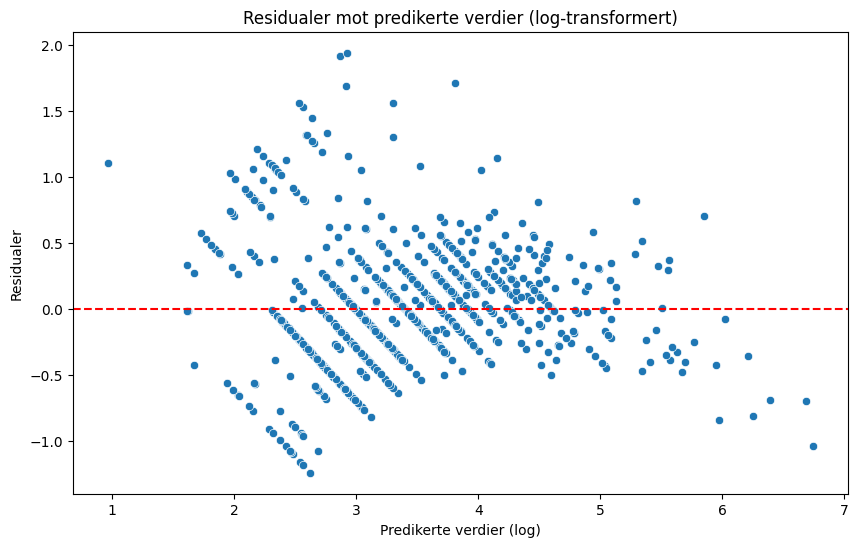

<Figure size 1000x600 with 0 Axes>

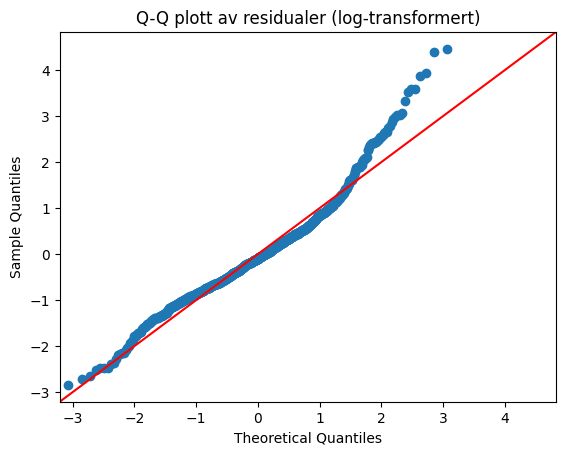

In [48]:
# Lag logaritmiske transformasjoner
df2['log_Price'] = np.log(df2['Price'])
df2['log_Pieces'] = np.log(df2['Pieces'])
df2['log_Unique_Pieces'] = np.log(df2['Unique_Pieces'])
df2['log_Pages'] = np.log(df2['Pages'])

# Tilpass transformert modell
log_model = smf.ols('log_Price ~ log_Pieces + C(theme_category) + Unique_Pieces + Pages', data=df2).fit()

print("\nTransformert modell:")
print(log_model.summary())

# Plott residualer for transformert modell
plt.figure(figsize=(10, 6))
sns.scatterplot(x=log_model.fittedvalues, y=log_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residualer mot predikerte verdier (log-transformert)')
plt.xlabel('Predikerte verdier (log)')
plt.ylabel('Residualer')
plt.show()

# QQ-plott for transformert modell
plt.figure(figsize=(10, 6))
sm.graphics.qqplot(log_model.resid, line='45', fit=True)
plt.title('Q-Q plott av residualer (log-transformert)')
plt.show()


Robust regresjon resultater:
                    Robust linear Model Regression Results                    
Dep. Variable:                  Price   No. Observations:                  922
Model:                            RLM   Df Residuals:                      919
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Nov 2024                                         
Time:                        10:19:22                                         
No. Iterations:                    26                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

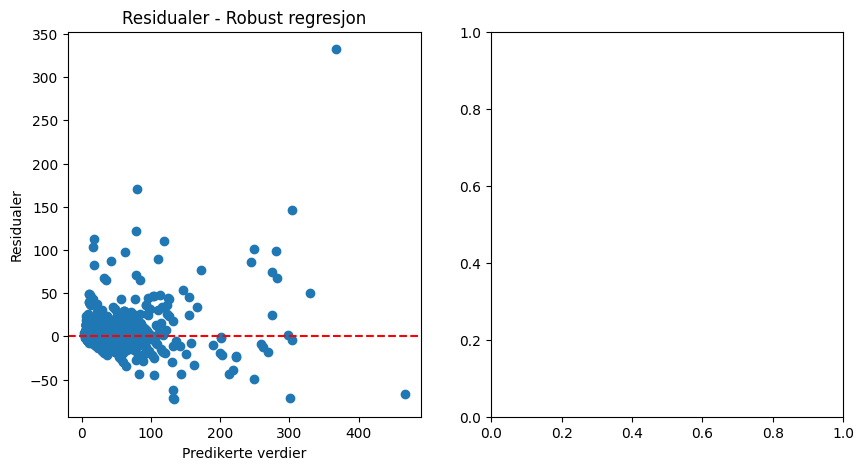

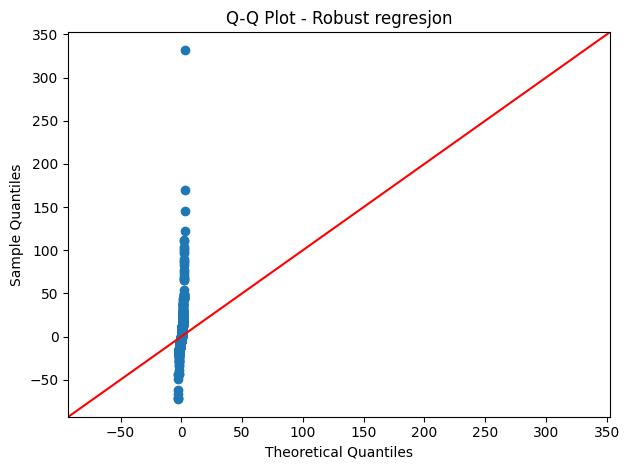


Normalitetstest for robust modell:
p-verdi: 0.0000000000


In [34]:
import statsmodels.api as sm
import numpy as np

# 1. Lag en modell som håndterer uteliggere bedre
# Bruk robust regresjon (Huber's T norm)
X = df2[['Pieces', 'Unique_Pieces']]
X = sm.add_constant(X)
y = df2['Price']

# Robust regresjon
robust_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

# 2. Prøv en kvantilregresjon (median regresjon)
quantile_model = sm.QuantReg(y, X)
quantile_results = quantile_model.fit(q=0.5)

# Print resultater
print("\nRobust regresjon resultater:")
print(robust_results.summary())

print("\nKvantil regresjon resultater:")
print(quantile_results.summary())

# Plott residualer for robust modell
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(robust_results.fittedvalues, robust_results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residualer - Robust regresjon')
plt.xlabel('Predikerte verdier')
plt.ylabel('Residualer')

# QQ-plot for robust modell
plt.subplot(122)
sm.graphics.qqplot(robust_results.resid, line='45')
plt.title('Q-Q Plot - Robust regresjon')
plt.tight_layout()
plt.show()

# Test normalitet for robust modell
from scipy import stats
stat, p_value = stats.normaltest(robust_results.resid)
print(f"\nNormalitetstest for robust modell:")
print(f"p-verdi: {p_value:.10f}")


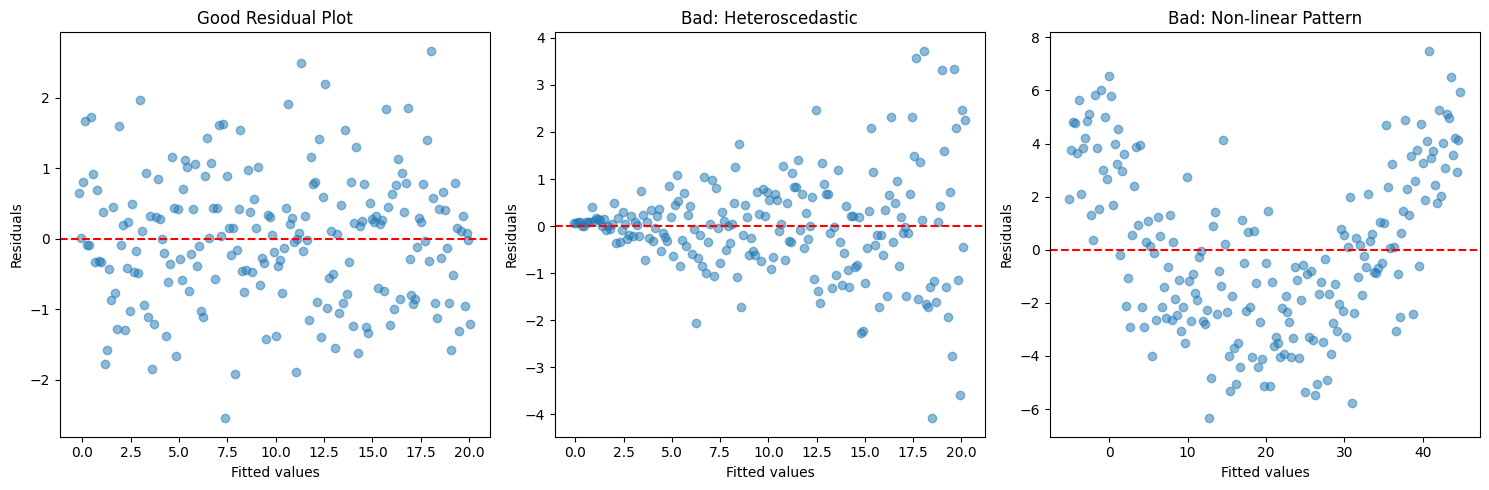

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
np.random.seed(42)
n = 200
x = np.linspace(0, 10, n)

# Good residuals - homoscedastic, normal, no pattern
y_good = 2 * x + np.random.normal(0, 1, n)
model_good = sm.OLS(y_good, sm.add_constant(x)).fit()

# Bad residuals - heteroscedastic
noise = np.random.normal(0, 0.2 * x, n)
y_hetero = 2 * x + noise
model_hetero = sm.OLS(y_hetero, sm.add_constant(x)).fit()

# Bad residuals - non-linear pattern
y_nonlin = 2 * x + 0.3 * x**2 + np.random.normal(0, 2, n)
model_nonlin = sm.OLS(y_nonlin, sm.add_constant(x)).fit()

# Plot examples
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Good residuals
axes[0].scatter(model_good.fittedvalues, model_good.resid, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Good Residual Plot')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')

# Heteroscedastic residuals
axes[1].scatter(model_hetero.fittedvalues, model_hetero.resid, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Bad: Heteroscedastic')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residuals')

# Non-linear pattern
axes[2].scatter(model_nonlin.fittedvalues, model_nonlin.resid, alpha=0.5)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_title('Bad: Non-linear Pattern')
axes[2].set_xlabel('Fitted values')
axes[2].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


Resultater for Complex kompleksitet:
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.0671      0.166      6.412      0.000       0.740       1.395
C(theme_category)[T.regular]    -0.0516      0.067     -0.769      0.443      -0.184       0.081
C(theme_category)[T.unknown]    -0.5018      0.175     -2.870      0.004      -0.846      -0.158
np.log(Pieces)                   0.4156      0.035     11.989      0.000       0.347       0.484


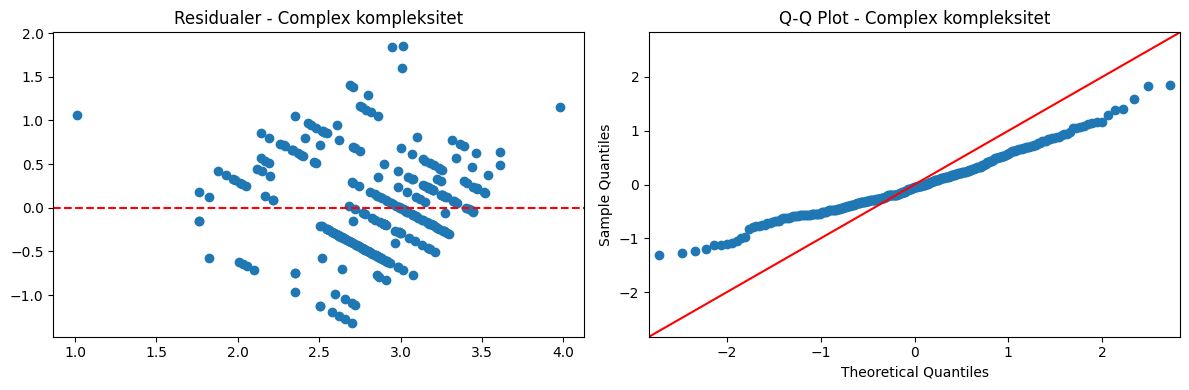


For Complex kompleksitet:
Estimert prisforskjell ved 113 brikker: 1.04 $

Resultater for Medium kompleksitet:
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.7184      0.167    -10.319      0.000      -2.046      -1.391
C(theme_category)[T.regular]    -0.0323      0.042     -0.765      0.445      -0.115       0.051
C(theme_category)[T.unknown]    -0.2879      0.074     -3.886      0.000      -0.434      -0.142
np.log(Pieces)                   0.9162      0.030     30.569      0.000       0.857       0.975


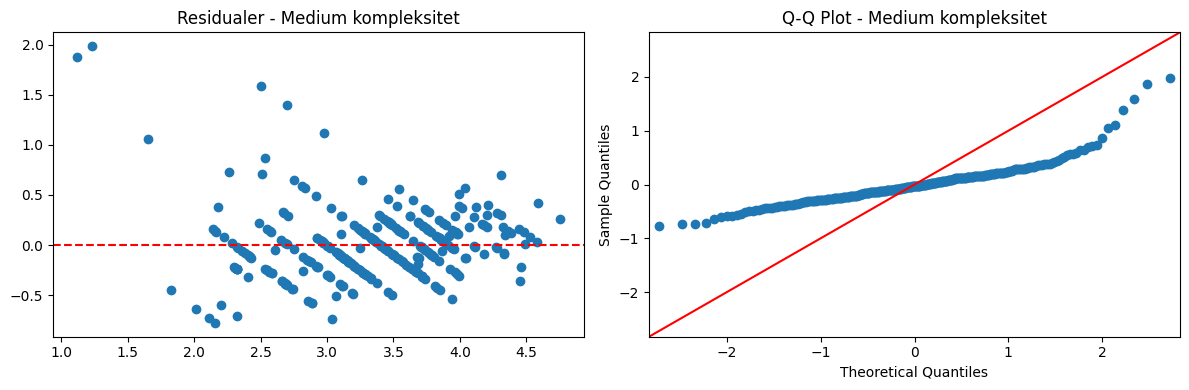


For Medium kompleksitet:
Estimert prisforskjell ved 311 brikker: 1.10 $

Resultater for Simple kompleksitet:
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.2128      0.138    -16.065      0.000      -2.484      -1.942
C(theme_category)[T.regular]    -0.1371      0.038     -3.627      0.000      -0.211      -0.063
C(theme_category)[T.unknown]    -0.2035      0.060     -3.415      0.001      -0.321      -0.086
np.log(Pieces)                   0.9888      0.021     47.211      0.000       0.948       1.030


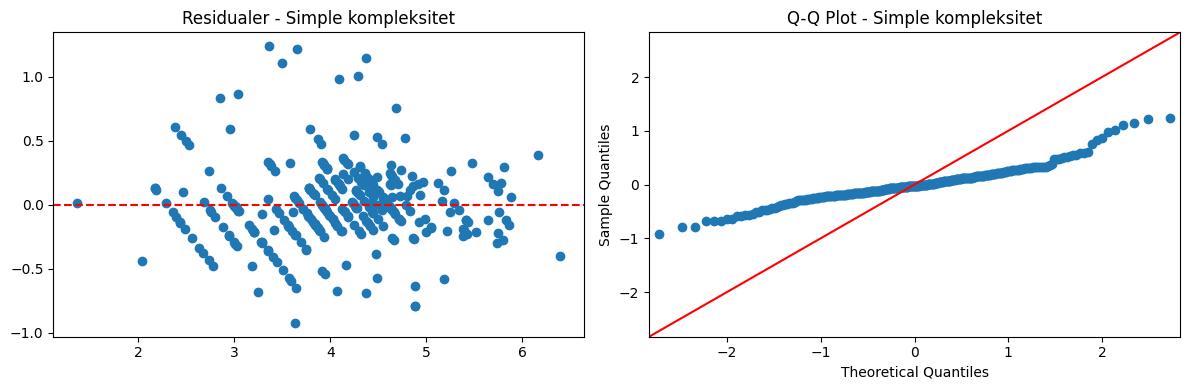


For Simple kompleksitet:
Estimert prisforskjell ved 888 brikker: 11.53 $


In [37]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# 1. Del opp datasettet basert på kompleksitet
df2['complexity'] = df2['Unique_Pieces'] / df2['Pieces']
df2['complexity_group'] = pd.qcut(df2['complexity'], 3, labels=['Simple', 'Medium', 'Complex'])

# 2. Separat analyse for hver kompleksitetsgruppe
results = {}
for group in df2['complexity_group'].unique():
    subset = df2[df2['complexity_group'] == group]
    
    # Bruk log-transformasjon for både pris og antall brikker
    model = smf.ols('np.log(Price) ~ np.log(Pieces) + C(theme_category)', data=subset).fit()
    results[group] = model
    
    print(f"\nResultater for {group} kompleksitet:")
    print(model.summary().tables[1])
    
    # Plott diagnostikk
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Residualplott
    ax1.scatter(model.fittedvalues, model.resid)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_title(f'Residualer - {group} kompleksitet')
    
    # QQ-plot
    sm.graphics.qqplot(model.resid, line='45', ax=ax2)
    ax2.set_title(f'Q-Q Plot - {group} kompleksitet')
    
    plt.tight_layout()
    plt.show()
    
    # Beregn gjennomsnittlig prisforskjell for pop-culture vs regular
    avg_pieces = subset['Pieces'].mean()
    pred_regular = model.predict({'Pieces': avg_pieces, 'theme_category': 'regular'})
    pred_pop = model.predict({'Pieces': avg_pieces, 'theme_category': 'pop_culture'})
    
    print(f"\nFor {group} kompleksitet:")
    print(f"Estimert prisforskjell ved {avg_pieces:.0f} brikker: {(np.exp(pred_pop) - np.exp(pred_regular)).mean():.2f} $")

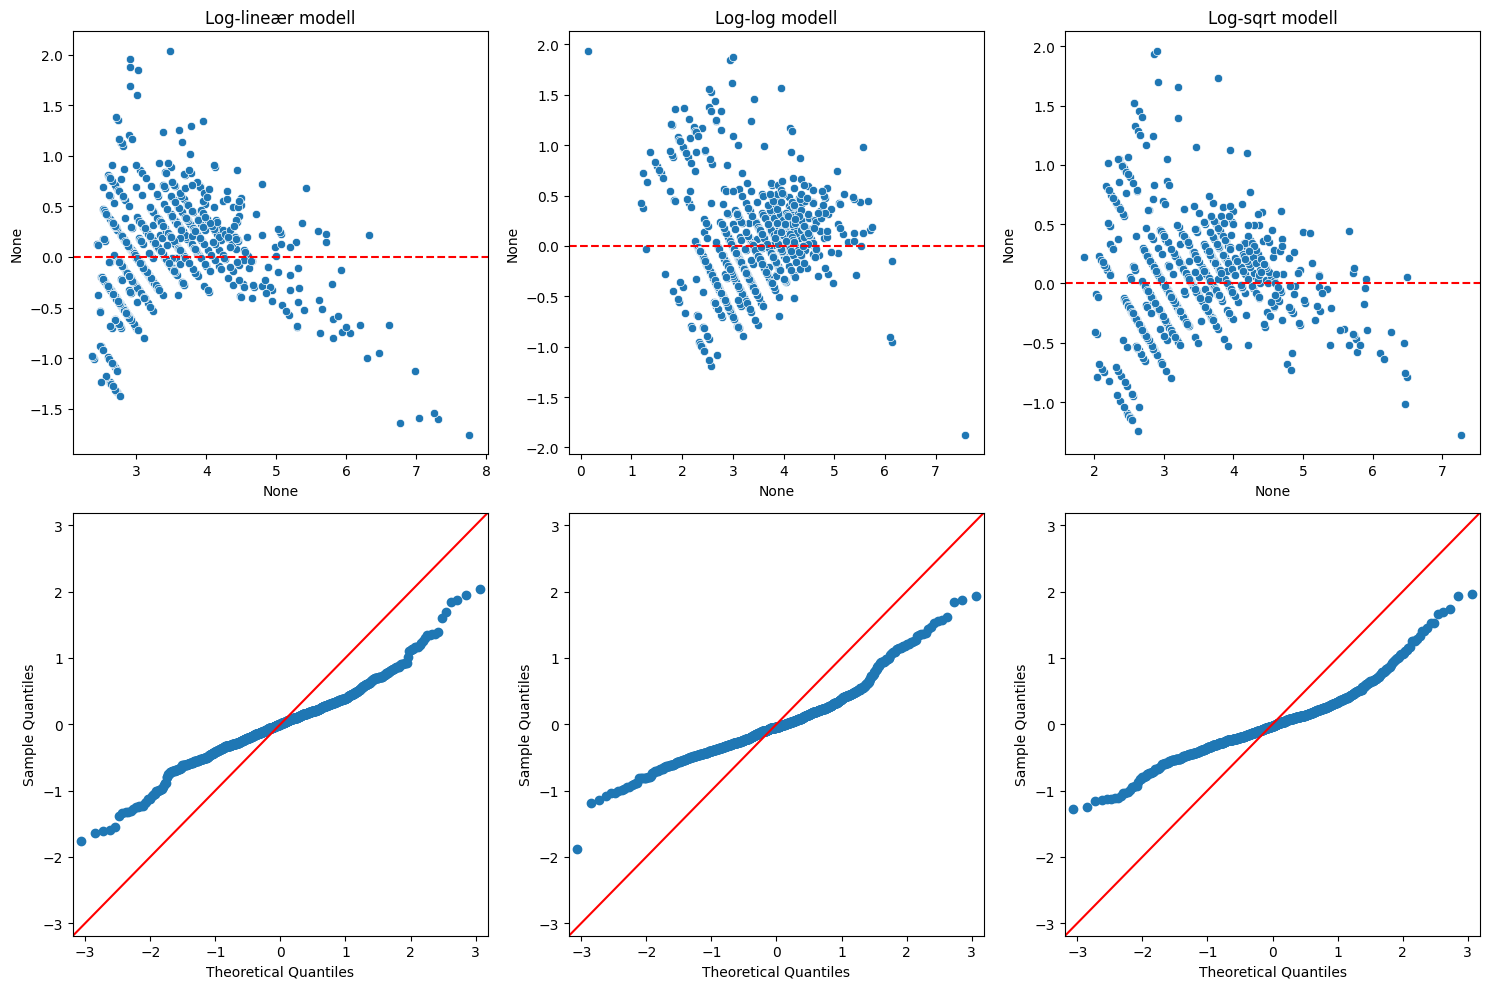


Justert R² sammenligning:
Log-lineær modell: 0.7229
Log-log modell: 0.7505
Log-sqrt modell: 0.7881


In [28]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Minifigures        12.99
Unikitty           18.99
Powerpuff Girls    24.99
Name: Price, dtype: float64

In [6]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Stranger Things    2287.0
Powered UP         2113.5
Creator Expert     1958.8
Name: Pieces, dtype: float64

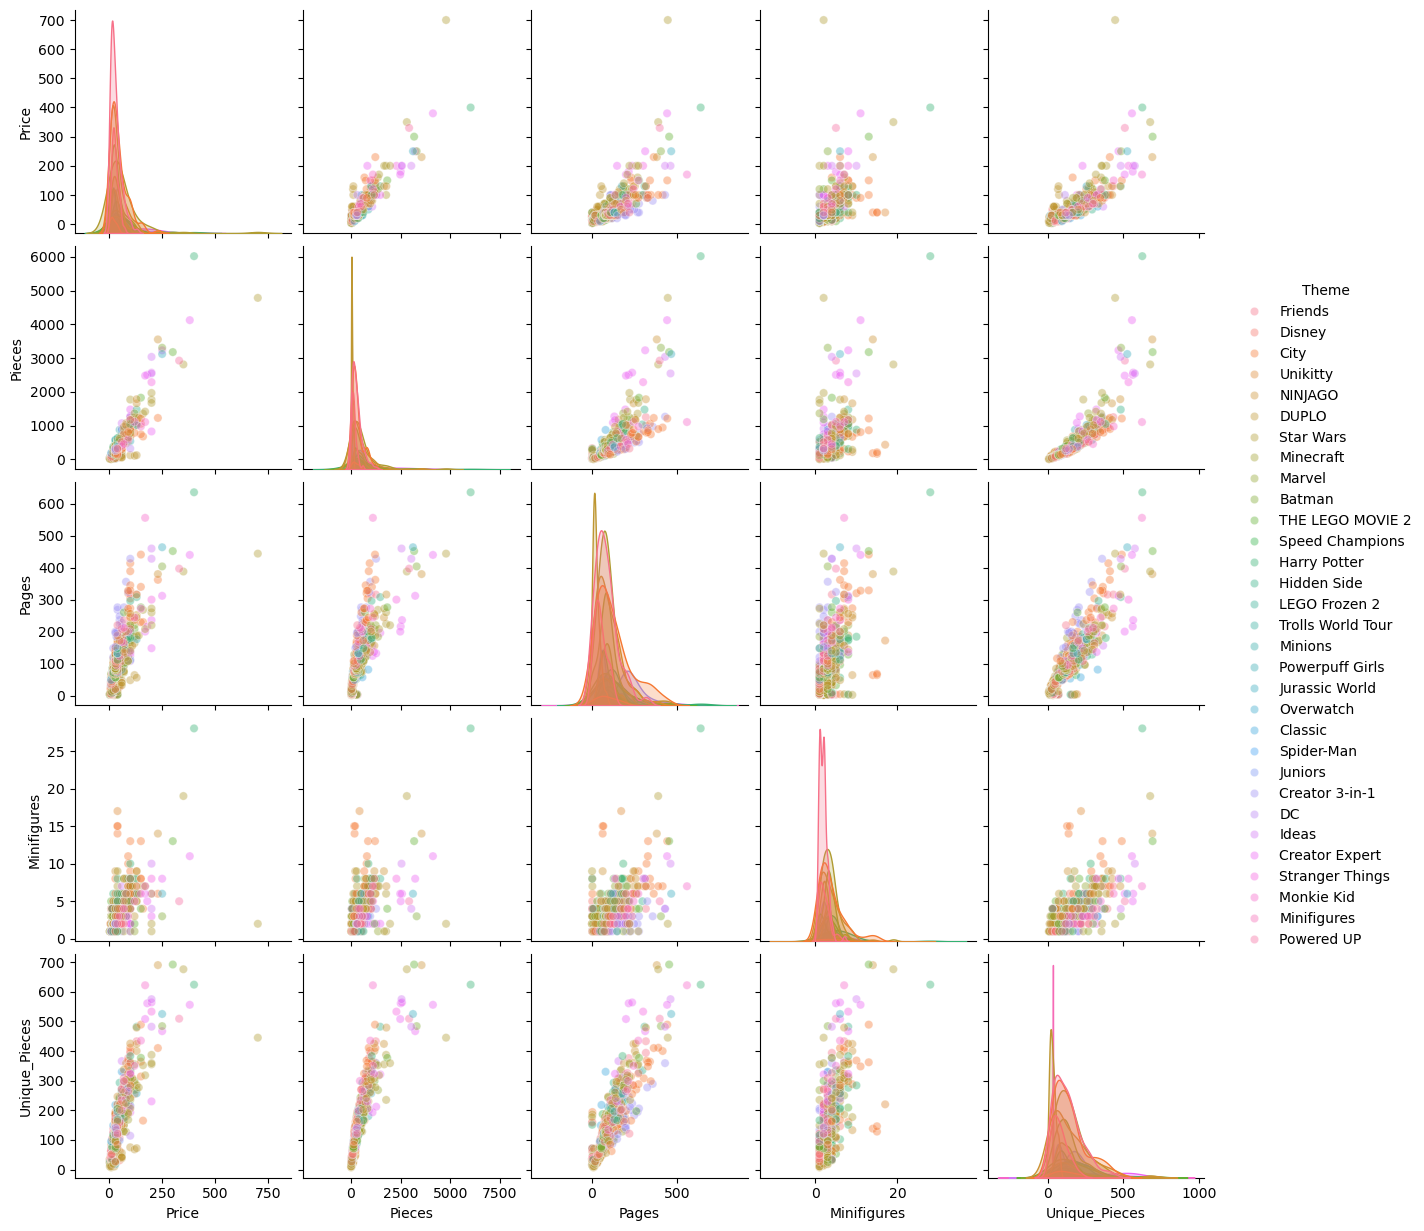

In [32]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [31]:
# enkel lineær regresjon
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     5415.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:26:54   Log-Likelihood:                -4161.6
No. Observations:                 922   AIC:                             8327.
Df Residuals:                     920   BIC:                             8337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8962      0.894      9.951      0.000       7.142      10.651
Pieces         0.0872      0.001     73.589      0.000       0.085       0.090
==============================================================================
Omnibus:                      736.003   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45431.936
Skew:                           3.115   Prob(JB):                         0.00
Kurtosis:                      36.820   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

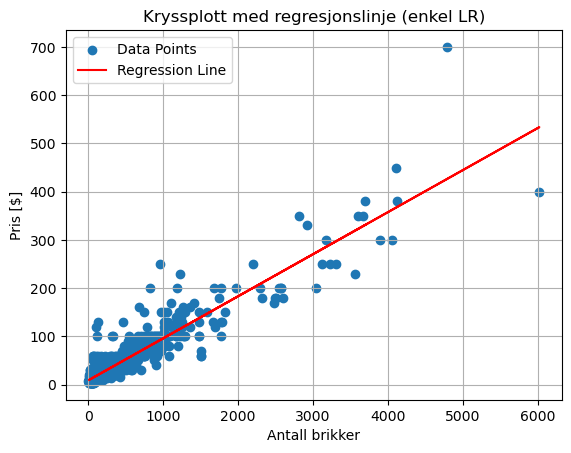

In [33]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

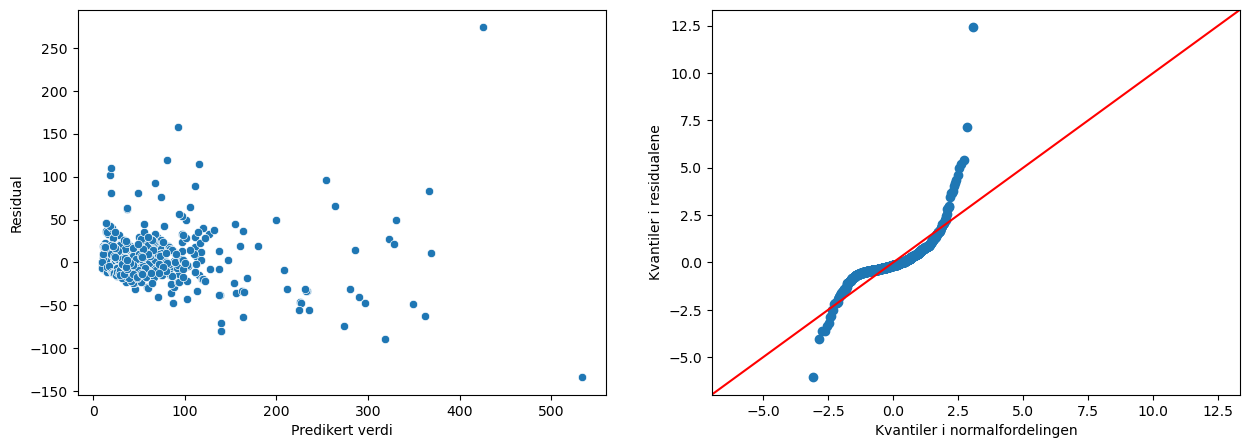

In [37]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

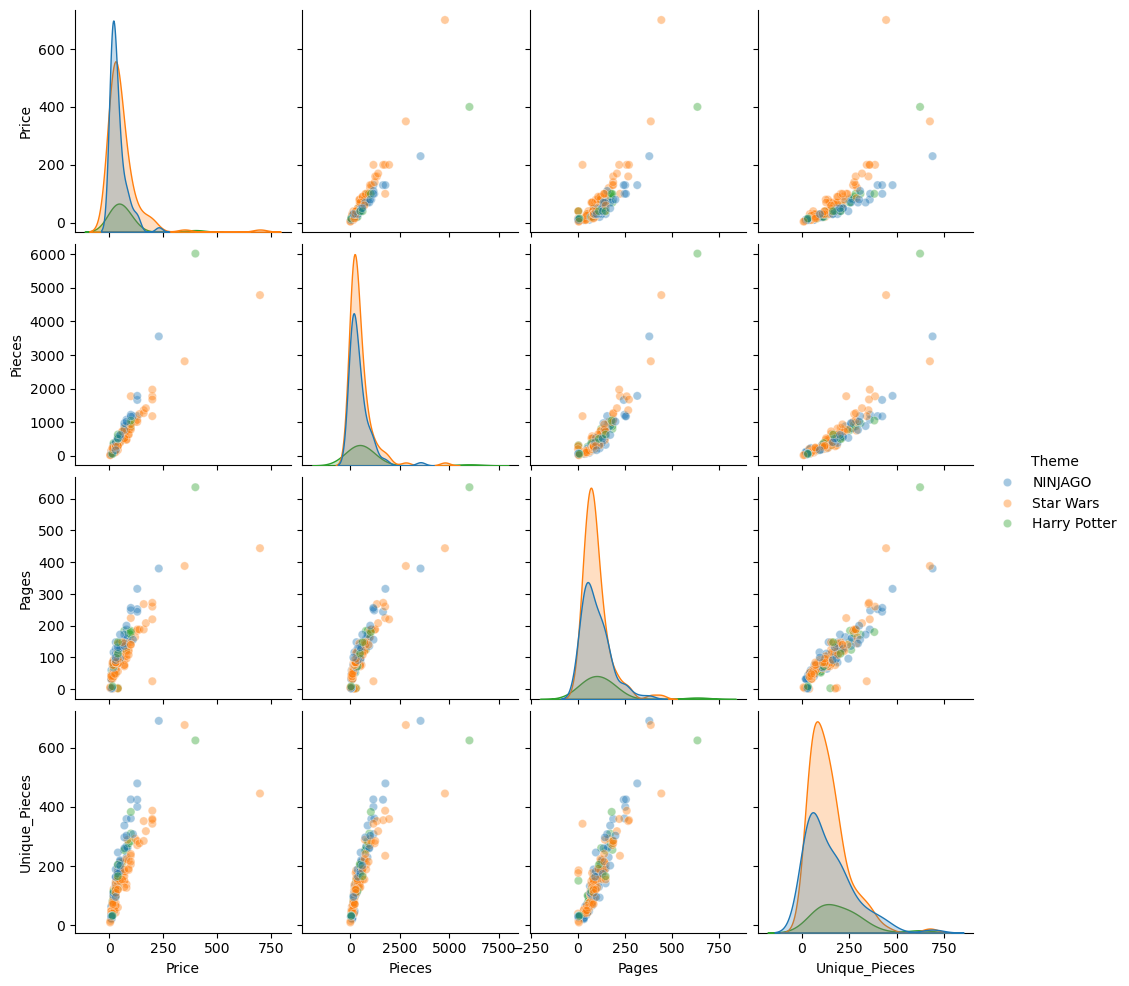

In [39]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages',  'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [45]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [47]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

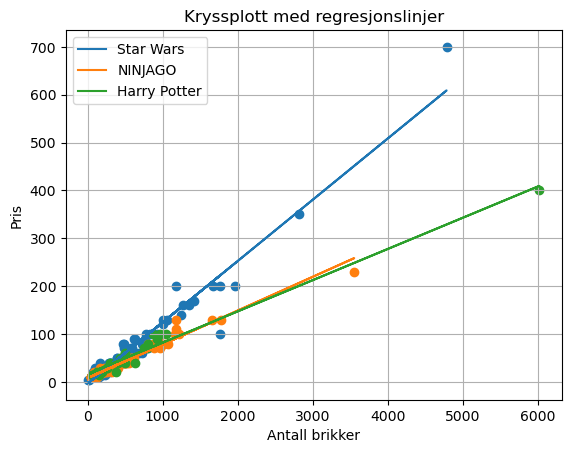

In [49]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [51]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Theme' , data = subset_df)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     448.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.61e-90
Time:                        15:07:58   Log-Likelihood:                -976.53
No. Observations:                 210   AIC:                             1961.
Df Residuals:                     206   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.2531      5.792     -0.907      0.366     -16.673       6.167
Theme[T.NINJAGO]       2.7036      6.225      0.434      0.665      -9.569      14.976
Theme[T.Star Wars]    17.7823      6.009      2.959      0.003       5.934      29.630
Pieces                 0.0946      0.003     36.185      0.000       0.089       0.100
==============================================================================
Omnibus:                      170.947   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16680.355
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      46.423   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     448.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.61e-90
Time:                        15:08:15   Log-Likelihood:                -976.53
No. Observations:                 210   AIC:                             1961.
Df Residuals:                     206   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           12.5292      2.745      4.564      0.000       7.117      17.942
C(Theme, Treatment("Star Wars"))[T.Harry Potter]   -17.7823      6.009     -2.959      0.003     -29.630      -5.934
C(Theme, Treatment("Star Wars"))[T.NINJAGO]        -15.0787      3.785     -3.984      0.000     -22.541      -7.616
Pieces                                               0.0946      0.003     36.185      0.000       0.089       0.100
==============================================================================
Omnibus:                      170.947   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16680.355
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      46.423   Cond. No.                     2.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

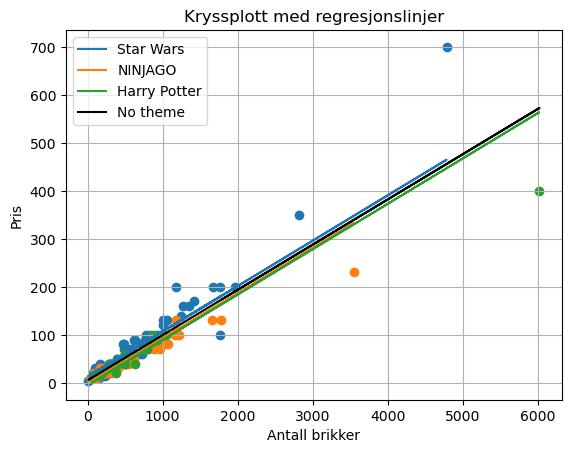

In [55]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [57]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     833.8
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.23e-133
Time:                        15:08:27   Log-Likelihood:                -866.62
No. Observations:                 210   AIC:                             1745.
Df Residuals:                     204   BIC:                             1765.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.8126      3.841      4.378      0.000       9.240      24.385
Theme[T.NINJAGO]             -8.9357      4.441     -2.012      0.046     -17.691      -0.180
Theme[T.Star Wars]          -20.5063      4.257     -4.817      0.000     -28.900     -12.113
Pieces                        0.0652      0.003     23.877      0.000       0.060       0.071
Pieces:Theme[T.NINJAGO]       0.0053      0.004      1.253      0.212      -0.003       0.014
Pieces:Theme[T.Star Wars]     0.0628      0.004     17.512      0.000       0.056       0.070
==============================================================================
Omnibus:                      126.015   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6524.151
Skew:                          -1.494   Prob(JB):                         0.00
Kurtosis:                      30.142   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

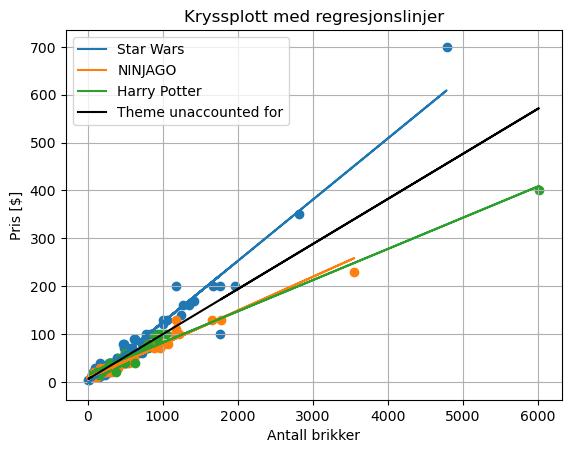

In [59]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

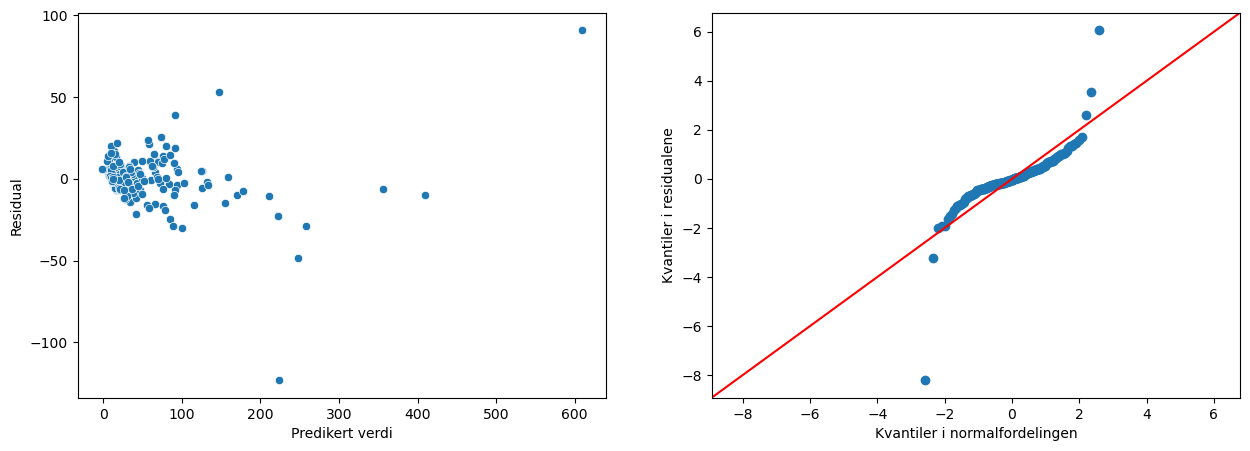

In [61]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [63]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

,cat,Count
0,Cat1,210
1,Cat2,194
2,Cat3,518


In [65]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Cat1,Harry Potter,22
1,Cat1,NINJAGO,78
2,Cat1,Star Wars,110
3,Cat2,City,94
4,Cat2,Friends,100
5,Cat3,Architecture,11
6,Cat3,Batman,16
7,Cat3,BrickHeadz,31
8,Cat3,Classic,20
9,Cat3,Creator 3-in-1,38
